In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
winedata = pd.read_csv("../Data/wine-clustering.csv")

In [52]:
winedata.shape

(178, 13)

In [8]:
features = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
           'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']
# Separating out the features
x = winedata.loc[:, features].values
x = StandardScaler().fit_transform(x)

In [12]:
pd.DataFrame(x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [13]:
pca = PCA()
pca_fit = pca.fit_transform(x)

In [41]:
pca_fit = pd.DataFrame(pca_fit).add_prefix('PC')

In [43]:
winedatapca = pd.concat([winedata, pca_fit], axis = 1)

In [54]:
winedatapca.shape

(178, 26)

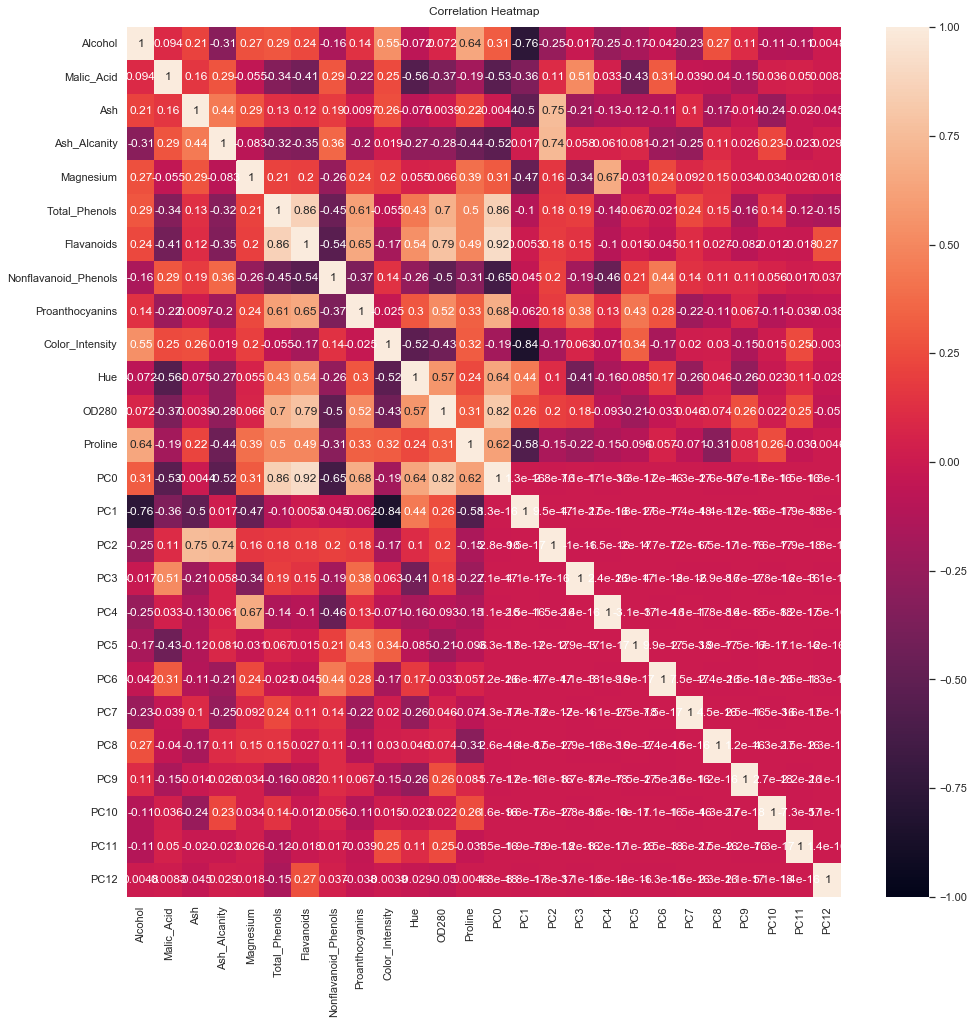

In [46]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 16))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(winedatapca.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [15]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [57]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627, 0.29051203, 0.25232001,
       0.22706428, 0.16972374, 0.10396199])

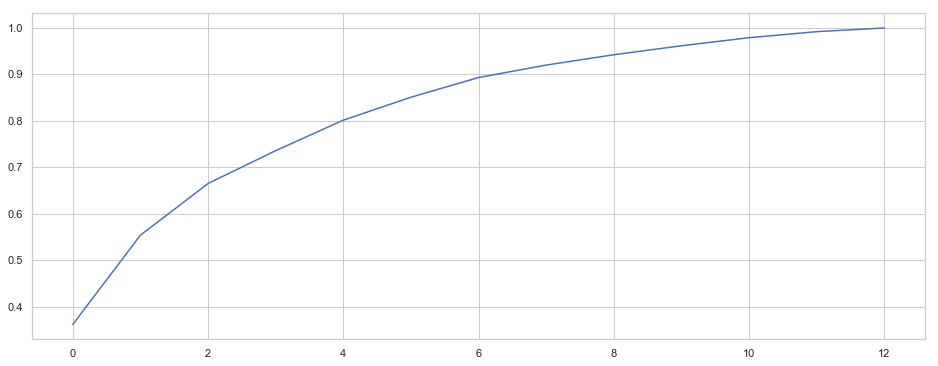

In [23]:
# sns.lineplot(np.cumsum(pca.explained_variance_ratio_))
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_))

In [25]:
print(pca.explained_variance_)

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]


In [38]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
4,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
5,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
6,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
7,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
8,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
9,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


In [56]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, index=features).add_prefix('PC')
loading_matrix

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Alcohol,0.313977,-0.766413,-0.250087,-0.017166,-0.246087,-0.171534,-0.041982,-0.234515,0.274141,0.106292,-0.107652,-0.109703,0.004827
Malic_Acid,-0.533385,-0.356434,0.107342,0.516132,0.032619,-0.431220,0.313041,-0.038970,-0.040577,-0.155255,0.036446,0.050136,0.008372
Ash,-0.004462,-0.500855,0.755176,-0.205895,-0.132486,-0.124089,-0.111044,0.100794,-0.165845,-0.013625,-0.237633,-0.020443,-0.045533
Ash_Alcanity,-0.520622,0.016782,0.738120,0.058506,0.061232,0.080992,-0.213622,-0.253359,0.108041,0.026522,0.228399,-0.022965,0.029561
Magnesium,0.308892,-0.474812,0.157682,-0.338195,0.673472,-0.030641,0.240357,0.092566,0.146284,0.034092,0.033970,0.025633,0.018306
Total_Phenols,0.858552,-0.103064,0.176280,0.190410,-0.138315,0.067575,-0.020788,0.240314,0.154170,-0.160807,0.145022,-0.125192,-0.149578
Flavanoids,0.920058,0.005324,0.181710,0.146406,-0.100992,0.015198,-0.045174,0.110850,0.026722,-0.081953,-0.012244,-0.017673,0.268346
Nonflavanoid_Phenols,-0.649434,-0.045605,0.205450,-0.195440,-0.463806,0.207727,0.443255,0.138105,0.105374,0.108266,0.055702,0.017448,0.036770
Proanthocyanins,0.681840,-0.062279,0.180230,0.383627,0.126775,0.428795,0.277023,-0.217991,-0.112727,0.067403,-0.113106,-0.039365,-0.037698
Color_Intensity,-0.192778,-0.839852,-0.165580,0.063377,-0.070804,0.336295,-0.169510,0.020008,0.030301,-0.146061,0.015172,0.248924,-0.003867
